#  📚 1.3机器学习


         ✅能今天做好的事就不要等到明天。以梦为马，学习趁年华.

----------------------------------------------------------------------------------------------------------------

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161605698805520151616056987164.png"/>

# 一、本节目标
        了解机器学习，深度学习整体流程。

# 二、开胃小菜
  

在学习tensorflow2.0框架之前，我们先要了解算法，当我们正在上网浏览东西，购买商品，观看抖音时，你在网上的记录都会通过算法搜集到，然后大牛就会根据搜集到的信息，进行分析，从而给你推荐你感兴趣的视频，商品等，那么要实现这样一个简单的具有人类思维的想法，计算机怎么做到的呢？所以就会有现在比较流行的领域，推荐系统，文本分类，风格迁移，三维重建等一系列的新鲜算法，那么完成这些有点庞大，所以很多公司，学校就想着做这样一个框架，让科研者只需要关注本质，而不需要重复的造轮胎，所以这些框架包括tensorflow，pytorch，caffe等等，这些主流的框架是你学习机器学习快速建模的一个工具，了解其中的一个就可以知道其他的原理了。
接下来以一个小例子开头，假设我们有一个有规律的一些数据，我们想要找到一些因果关系，这里以一个线性方程为例子。利用自己人工 生成的数据，提取其中的特征，找到规律，拟合一个模型 ，来求得正确的值。

## 2.1 生成数据集

本例子是人工生成的数据集，当然只针对你想做的可以找到自己方向的数据集，比如做目标检测的就会有一定格式的数据集：https://blog.csdn.net/liuxiao214/article/details/80552026
做图像分割的也会有自己的数据集，我们做的第一步是观测自己的数据集，一定要清楚自己的数据集里面有哪些样本，有哪些标签，以什么 样的格式保存，总之一句话：了解数据集。我的数据集，里面有数据x_data,

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# 定义正确的权重和偏置
TRUE_W = 3.0   #这权值里我们是要通过模型预测出权重
TRUE_b = 2.0   #这权值里我们是要通过模型预测出偏置

# 制作训练数据,添加一些噪声进去
NUM_EXAMPLES = 100
inputs = tf.random.normal(shape=[NUM_EXAMPLES])  #制作的数据集
noise = tf.random.normal(shape = [NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise    #这是我的标签


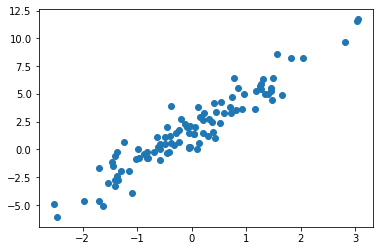

In [2]:
plt.scatter(inputs, outputs, label='Original data')
plt.show()

可以看到上图，我的数据集就是这样，有inputs，outputs。现在我要从里面找到一种模型 ，这种模型可以总结出数据集的特点。所以接下来，要构建我们的模型。一般论文中都会在模型中改方法，做工作，所以，读论文时，要关注框架图，从输入，到输出，数据怎么流入，流出，经过哪些模块，要熟悉，然后看论文的具体代码怎么实现的。

## 2.2 构建模型

下面就是定义的一个简单的模型，线性模型 self.W * inputs + self.b  ，当然现在的模型就特别复杂，类似于下图，那么就可以看看论文的代码，看模型怎么定义

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161605758211173951616057578074.png"/>

In [3]:
#定义模型和损失函数
class Model(object):
    def __init__(self): #初始化参数
        self.W = tf.Variable(10.0)
        self.b = tf.Variable(-5.0)
     #基于函数定义的模型
    def __call__(self, inputs):
        return self.W * inputs + self.b
#设计它的损失函数
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))
model = Model()   

In [4]:
def plot(epoch):  #传入epoch参数，
    plt.scatter(inputs, outputs, c='b')  # 画散点图，传入inputs，outputs数据集，c是颜色为blue
    plt.scatter(inputs, model(inputs), c='r')  #传入inputs, 预测的model(inputs)，c是红色
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(outputs, model(inputs)).numpy())))
    plt.legend()  #plt.legend（）函数主要的作用就是给图加上图例，
    plt.draw()  #将重新绘制该数字.这允许您以交互模式工作,如果您更改了数据或格式,则允许图表本身更改.
    plt.ion()   # # 打开交互模式
    plt.pause(1)#plt.pause()会把它之前的所有绘图都绘制在对应坐标系中，而不仅仅是在当前坐标系中绘图；
    #plt.pause(time)函数也能实现窗口绘图（不需要plt.show）,但窗口只停留time时间便会自动关闭，然后再继续执行后面代码；
    plt.close()

## 2.3 训练模型

  最主要的是训练模型，训练的主要内容是：先前向传播，计算损失，在反向传播，更新参数。

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 6.30; b_true= 2.00, b_pred= -2.22, loss= 114.04


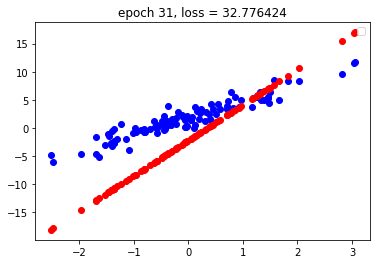

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 4.53; b_true= 2.00, b_pred= -0.58, loss= 32.78


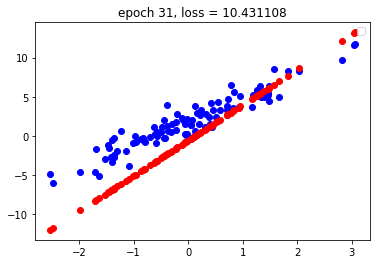

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 3.68; b_true= 2.00, b_pred= 0.39, loss= 10.43


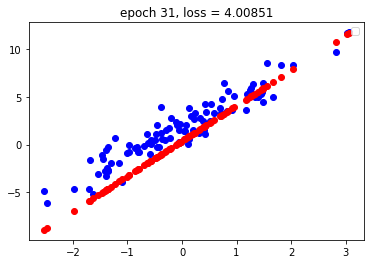

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 3.27; b_true= 2.00, b_pred= 0.96, loss= 4.01


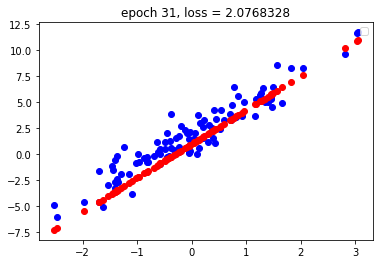

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 3.08; b_true= 2.00, b_pred= 1.31, loss= 2.08


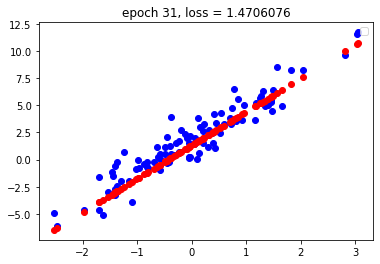

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.99; b_true= 2.00, b_pred= 1.51, loss= 1.47


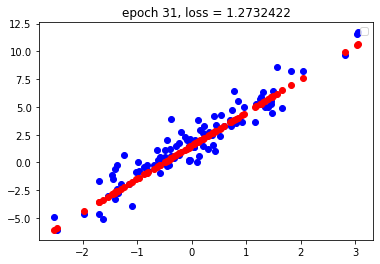

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.95; b_true= 2.00, b_pred= 1.63, loss= 1.27


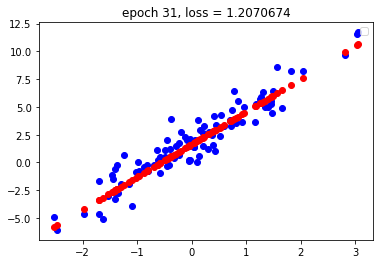

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.93; b_true= 2.00, b_pred= 1.71, loss= 1.21


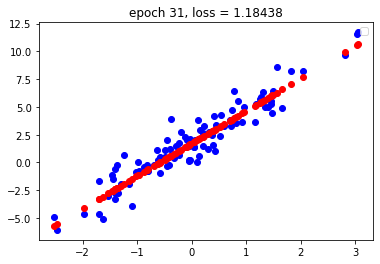

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.92; b_true= 2.00, b_pred= 1.75, loss= 1.18


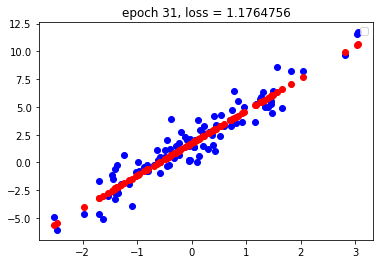

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.78, loss= 1.18


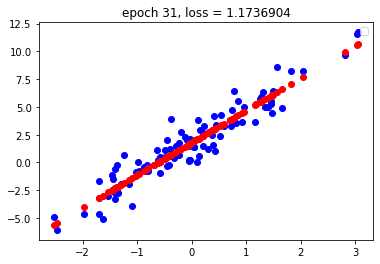

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.79, loss= 1.17


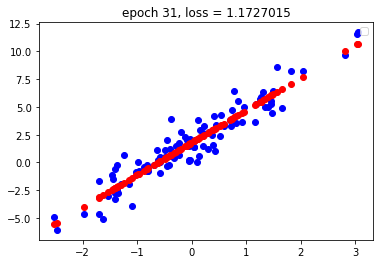

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.80, loss= 1.17


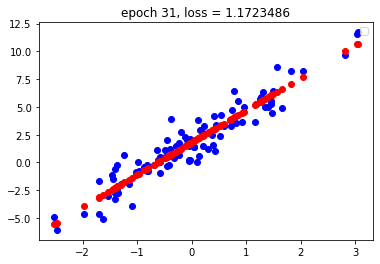

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


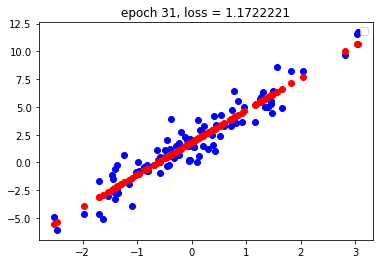

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


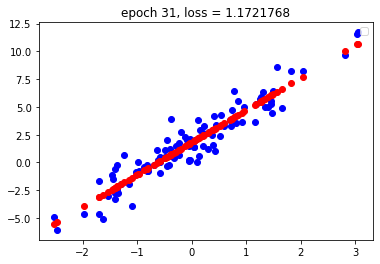

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


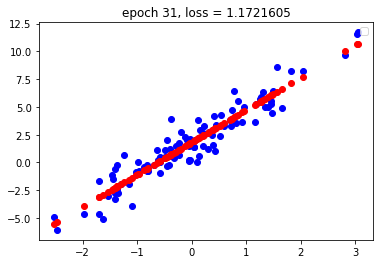

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


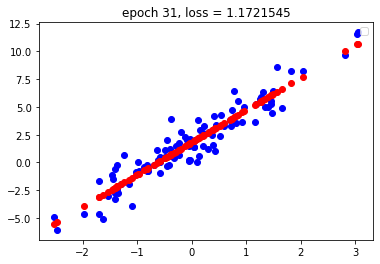

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


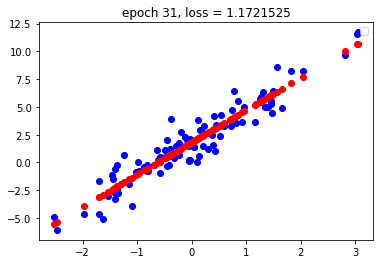

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


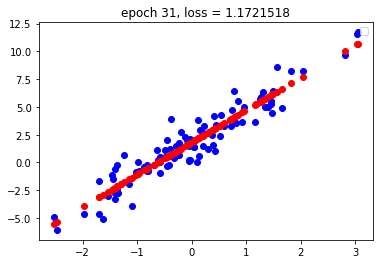

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


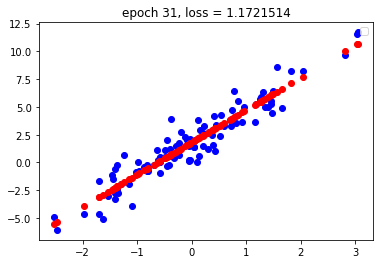

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


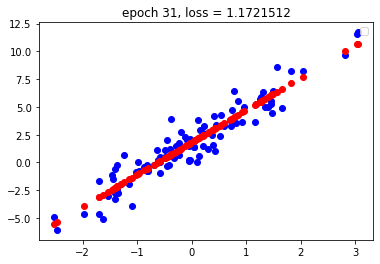

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


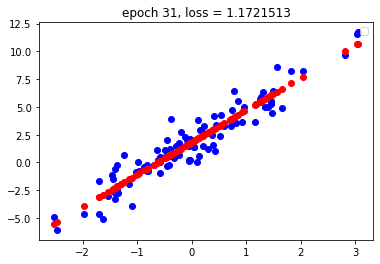

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


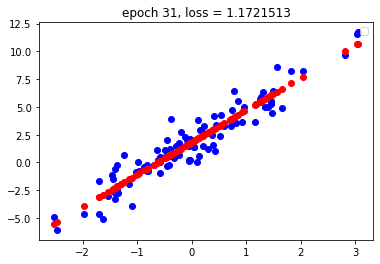

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


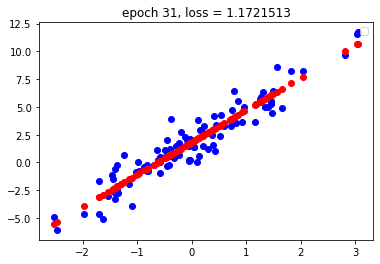

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


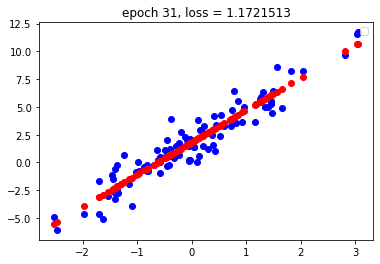

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


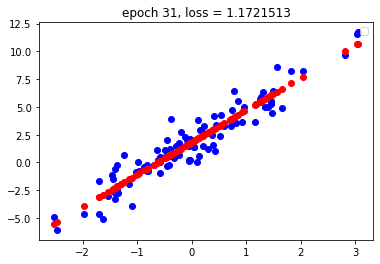

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


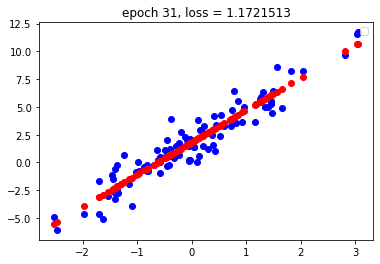

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


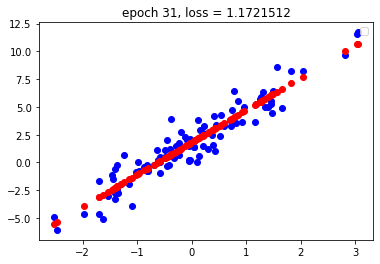

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


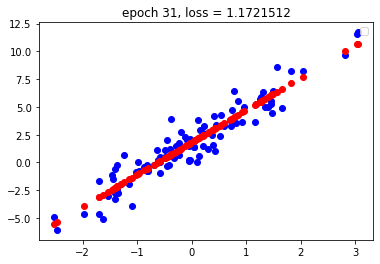

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


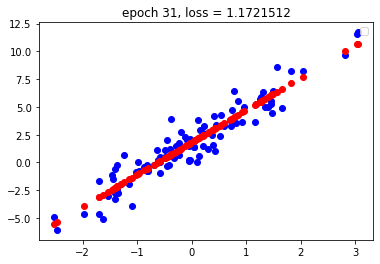

No handles with labels found to put in legend.


=> epoch 31: w_true= 3.00, w_pred= 2.91; b_true= 2.00, b_pred= 1.81, loss= 1.17


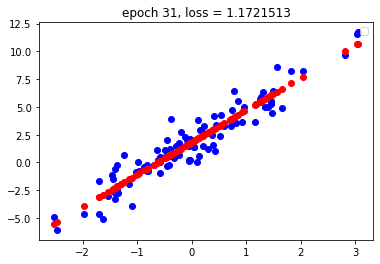

In [5]:
learning_rate=0.2  #设置损失函数的学习率
epoch=30   #设置epoch的数量   ，1个epoch是一整个数据集，bachsize是一次性送入网络中的样本数量，用总的数据集/bachsize=迭代数
for i in range(30):  #进行for循环
    with tf.GradientTape() as tape:
        loss = compute_loss(outputs, model(inputs)) # 计算损失
    dW, db = tape.gradient(loss, [model.W, model.b])  # 计算梯度
    model.W.assign_sub(learning_rate * dW)  # 更新权重
    model.b.assign_sub(learning_rate * db)  # 更新权重

    print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, TRUE_W, model.W.numpy(), TRUE_b, model.b.numpy(), loss.numpy()))
    plot(epoch + 1)

## 2.4 测试数据

模型里面的参数已经训练好了，你就可以拿着参数，验证一下测试集 看是否准确

## 2.5 评估模型

拿着测试出来的数据，选择好评估函数看正确率怎么样。

# 四、课后作业

    1 了解机器学习的流程